In [66]:
#Imports the necessary libraries
import os
import pandas as pd
import geopandas as gpd             
import numpy as np
import palettable as pltt
import seaborn as sns
import matplotlib.pyplot as plt
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

import osmnx as ox, geopandas as gpd
%matplotlib inline
ox.config(log_console=True, use_cache=True)

import matplotlib.style as style 
style.use('seaborn-colorblind') 

In [67]:
data_18 = pd.read_csv('data/2018.csv')

In [68]:
data_19 = pd.read_csv('data/2019.csv')

In [69]:
data_20 = pd.read_csv('data/2020.csv')

In [70]:
data_18.head()

,Unnamed: 0,Neighbourhood,year,potential_labour_force,private_cars,offences,dutch_natives,n_inhabitants,population_density,older_65,single_person_households,households_without_children,households_with_children,disability_benefit,distance_to_gp,low_income_households,wealth_private_households,geometry,number_calls,number_calls_n
0,0,Archipelbuurt,2018,3943.0,0.61,269.0,57.9,6100,7014,1320,1855,780,735,130,0.3,5.9,109.5,"POLYGON ((4.306254151048128 52.09662959799297,...",1260.0,0.206557
1,2,Arendsdorp,2018,701.0,0.88,69.0,57.8,1305,2552,340,225,125,180,10,0.6,6.2,469.3,"POLYGON ((4.323289661487788 52.09920995837605,...",173.0,0.132567
2,4,Belgisch Park,2018,5310.0,0.72,460.0,63.4,8205,7747,1655,2115,1000,1095,220,0.8,7.1,76.0,"POLYGON ((4.28055557947404 52.11705929964018, ...",569.0,0.069348
3,6,Bezuidenhout-Midden,2018,2994.0,0.56,421.0,52.2,4285,6908,550,1235,520,555,80,0.7,4.8,75.2,"POLYGON ((4.334697269720919 52.08803839554967,...",390.0,0.091015
4,8,Bezuidenhout-Oost,2018,6708.0,0.58,395.0,61.2,9010,11737,1200,2780,1425,1050,200,0.4,5.2,37.8,"POLYGON ((4.342348958074489 52.09126303890616,...",339.0,0.037625


In [71]:
data_18 = data_18.set_index('Neighbourhood')

In [72]:
data_18.head()

,Unnamed: 0,year,potential_labour_force,private_cars,offences,dutch_natives,n_inhabitants,population_density,older_65,single_person_households,households_without_children,households_with_children,disability_benefit,distance_to_gp,low_income_households,wealth_private_households,geometry,number_calls,number_calls_n
Neighbourhood,,,,,,,,,,,,,,,,,,,
Archipelbuurt,0,2018,3943.0,0.61,269.0,57.9,6100,7014,1320,1855,780,735,130,0.3,5.9,109.5,"POLYGON ((4.306254151048128 52.09662959799297,...",1260.0,0.206557
Arendsdorp,2,2018,701.0,0.88,69.0,57.8,1305,2552,340,225,125,180,10,0.6,6.2,469.3,"POLYGON ((4.323289661487788 52.09920995837605,...",173.0,0.132567
Belgisch Park,4,2018,5310.0,0.72,460.0,63.4,8205,7747,1655,2115,1000,1095,220,0.8,7.1,76.0,"POLYGON ((4.28055557947404 52.11705929964018, ...",569.0,0.069348
Bezuidenhout-Midden,6,2018,2994.0,0.56,421.0,52.2,4285,6908,550,1235,520,555,80,0.7,4.8,75.2,"POLYGON ((4.334697269720919 52.08803839554967,...",390.0,0.091015
Bezuidenhout-Oost,8,2018,6708.0,0.58,395.0,61.2,9010,11737,1200,2780,1425,1050,200,0.4,5.2,37.8,"POLYGON ((4.342348958074489 52.09126303890616,...",339.0,0.037625


In [73]:
data_19 = data_19.set_index('Neighbourhood')

In [74]:
data_20 = data_20.set_index('Neighbourhood')

In [75]:
corr_matrix = data_18.corr()

In [76]:
from random import randint
color = []
n = 20
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

In [77]:
import seaborn as sns
color = sns.color_palette("flare", 11)

In [78]:
color

[(0.92198615, 0.60943622, 0.45509686),
 (0.91262605, 0.52893336, 0.40749715),
 (0.89737819, 0.44322747, 0.37043052),
 (0.87199254, 0.3633634, 0.35974223),
 (0.82754694, 0.29677989, 0.37712733),
 (0.75861834, 0.25356035, 0.40663694),
 (0.68113541, 0.23115942, 0.42717615),
 (0.60407977, 0.21017746, 0.43913439),
 (0.52386353, 0.18939409, 0.44182449),
 (0.44584668, 0.17360625, 0.43114133),
 (0.36833779, 0.15813871, 0.40911916)]

###### Outliers for number of calls > 2000 & > 1.5 for number of calls_n, for three of the neighbourhoods for all variables

#### Employed persons will be a limitation of our work

In [15]:
data_18 = data_18[data_18.number_calls < 2000]

In [16]:
data_18 = data_18[data_18.number_calls_n < 1.5]

In [79]:
from sklearn.metrics import mean_squared_error

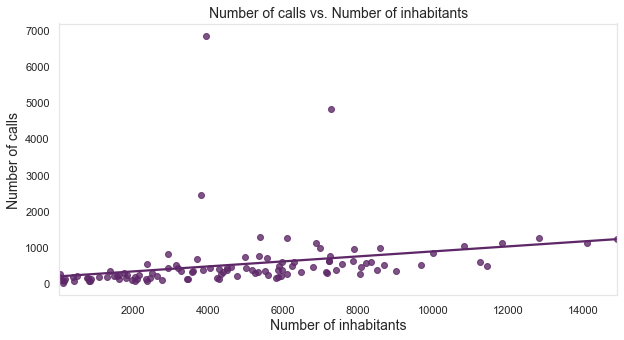

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "n_inhabitants", y = "number_calls", data=data_18, ci=None, color=color[10])
ax.set_xlabel('Number of inhabitants', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Number of inhabitants', fontsize=14)
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')
fig.savefig('figures_regplot/outliers/regplot_inhabitants.png', dpi=300, bbox_inches='tight')

for txt in fig.texts:
    txt.set_visible(False)

In [53]:
print('correlation private_cars:', round(corr_matrix.loc['number_calls', "n_inhabitants"], 5))

correlation private_cars: 0.27497


In [54]:
mean_squared_error(data_18["n_inhabitants"], data_18['number_calls_n'])

34268053.16961639

In [55]:
import math
math.sqrt(mean_squared_error(data_18["n_inhabitants"], data_18['number_calls_n']))

5853.892138536239

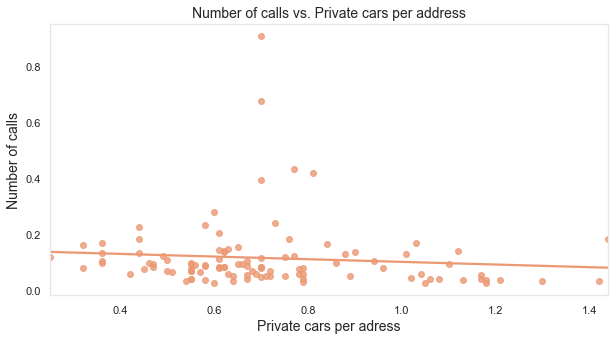

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "private_cars", y = "number_calls_n", data=data_18, ci=None, color=color[0])
ax.set_xlabel('Private cars per adress', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Private cars per address', fontsize=14)
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')
fig.savefig('figures/regplot_cars.png', dpi=300, bbox_inches='tight')

for txt in fig.texts:
    txt.set_visible(False)

In [19]:
print('correlation private_cars:', round(corr_matrix.loc['number_calls_n', 'private_cars'], 5))

correlation private_cars: -0.03716


In [24]:
mean_squared_error(data_18['private_cars'], data_18['number_calls_n'])

0.43795875896059844

In [27]:
import math
math.sqrt(mean_squared_error(data_18['private_cars'], data_18['number_calls_n']))

0.6617845260812604

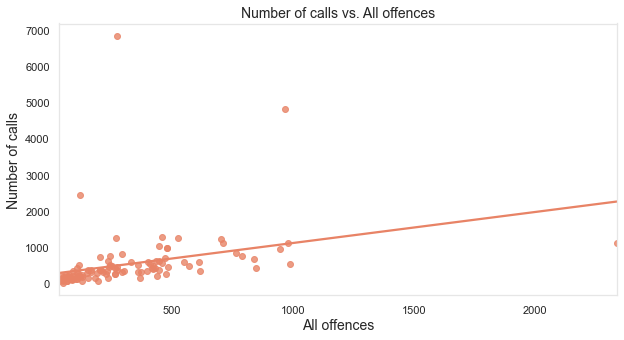

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "offences" , y ="number_calls", data=data_18, ci=None, color=color[1])
ax.set_xlabel('All offences', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. All offences', fontsize=14)
plt.show

ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)
    
fig.savefig('figures/regplot_offences.png', dpi=300, bbox_inches='tight')

In [18]:
print('correlation offences:', round(corr_matrix.loc['number_calls', 'offences'], 5))

correlation offences: 0.32022


In [23]:
mean_squared_error(data_18['offences'], data_18['number_calls'])

75467.45283018867

In [28]:
import math
math.sqrt(mean_squared_error(data_18['offences'], data_18['number_calls']))

274.7134012569985

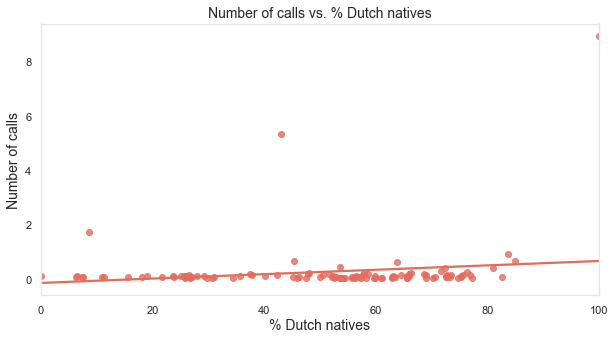

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "dutch_natives" , y = "number_calls_n", data=data_18, ci=None, color=color[2])
ax.set_xlabel('% Dutch natives' , fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. % Dutch natives', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)

ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)

fig.savefig('figures/regplot_dutch.png', dpi=300, bbox_inches='tight')

In [20]:
print('correlation dutch_natives:', round(corr_matrix.loc['dutch_natives', 'number_calls_n'], 5))

correlation dutch_natives: 0.17476


In [25]:
mean_squared_error(data_18['dutch_natives'], data_18['number_calls'])

229378.39669811318

In [29]:
import math
math.sqrt(mean_squared_error(data_18['dutch_natives'], data_18['number_calls']))

478.9346476275372

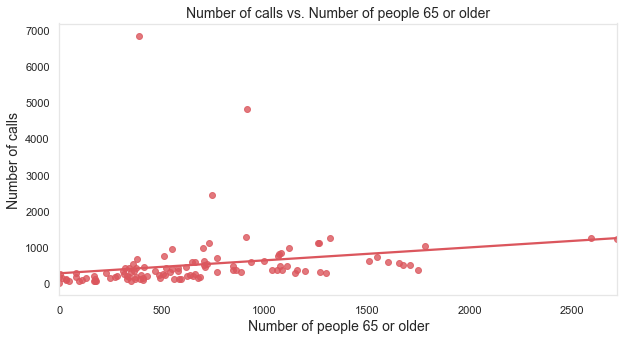

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "older_65", y = "number_calls", data=data_18, ci=None, color=color[3])
ax.set_xlabel('Number of people 65 or older', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Number of people 65 or older', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)

ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)

fig.savefig('figures/regplot_65.png', dpi=300, bbox_inches='tight')

In [22]:
print('correlation older_65:', round(corr_matrix.loc['older_65', 'number_calls'], 5))

correlation older_65: 0.22559


In [30]:
mean_squared_error(data_18['older_65'], data_18['number_calls'])

234612.7358490566

In [31]:
import math
math.sqrt(mean_squared_error(data_18['older_65'], data_18['number_calls']))

484.36838857326

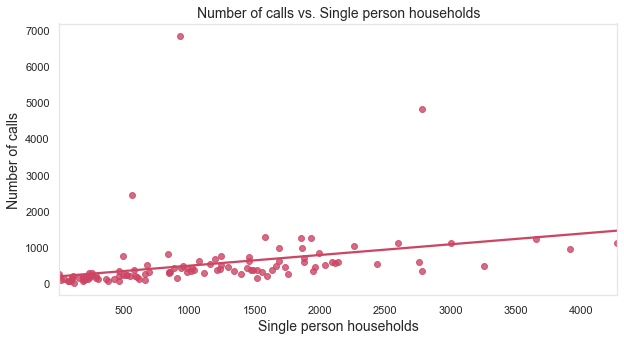

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "single_person_households" , y = "number_calls", data=data_18, ci=None, color=color[4])
ax.set_xlabel('Single person households', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Single person households', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)
    
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)
    
fig.savefig('figures/regplot_singlehouseholds.png', dpi=300, bbox_inches='tight')

In [24]:
print('correlation single_person_households:', round(corr_matrix.loc['single_person_households', 'number_calls'], 5))

correlation single_person_households: 0.32874


In [32]:
mean_squared_error(data_18['single_person_households'], data_18['number_calls'])

1009999.1509433963

In [33]:
import math
math.sqrt(mean_squared_error(data_18['single_person_households'], data_18['number_calls']))

1004.9871396905515

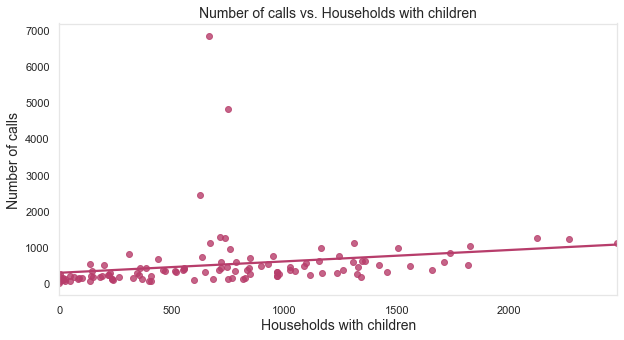

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "households_with_children", y = "number_calls", data=data_18, ci=None, color=color[5])
ax.set_xlabel('Households with children', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Households with children', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)
    
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)

fig.savefig('figures/regplot_childrenhouseholds.png', dpi=300, bbox_inches='tight')

In [26]:
print('correlation households_with_children:', round(corr_matrix.loc['households_with_children', 'number_calls'], 5))

correlation households_with_children: 0.21031


In [34]:
mean_squared_error(data_18['households_with_children'], data_18['number_calls'])

306398.72641509434

In [35]:
import math
math.sqrt(mean_squared_error(data_18['households_with_children'], data_18['number_calls']))

553.5329497103983

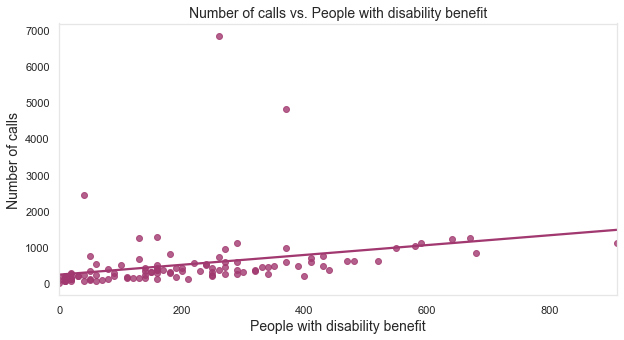

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "disability_benefit" , y = "number_calls", data=data_18, ci=None, color=color[6])
ax.set_xlabel('People with disability benefit', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. People with disability benefit', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)
    
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)
    
fig.savefig('figures/regplot_disability.png', dpi=300, bbox_inches='tight')

In [28]:
print('correlation disability_benefit:', round(corr_matrix.loc['disability_benefit', 'number_calls'], 5))

correlation disability_benefit: 0.29852


In [36]:
mean_squared_error(data_18['disability_benefit'], data_18['number_calls'])

91352.12264150943

In [37]:
import math
math.sqrt(mean_squared_error(data_18['disability_benefit'], data_18['number_calls']))

302.24513667139365

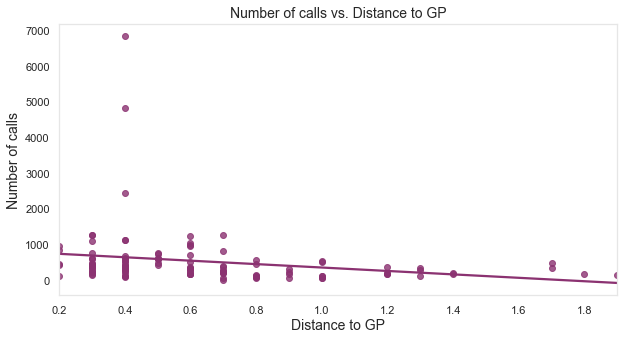

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "distance_to_gp" , y = "number_calls", data=data_18, ci=None, color=color[7])
ax.set_xlabel('Distance to GP' , fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Distance to GP', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)
    
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)
    
fig.savefig('figures/regplot_distanceGP.png', dpi=300, bbox_inches='tight')

In [30]:
print('correlation distance_to_gp:', round(corr_matrix.loc['distance_to_gp', 'number_calls'], 5))

correlation distance_to_gp: -0.21495


In [38]:
mean_squared_error(data_18['distance_to_gp'], data_18['number_calls'])

264788.5068867925

In [39]:
import math
math.sqrt(mean_squared_error(data_18['distance_to_gp'], data_18['number_calls']))

514.5760457763191

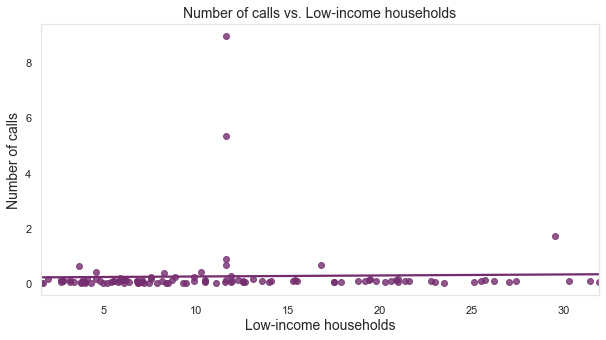

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "low_income_households", y = "number_calls_n", data=data_18, ci=None, color=color[8])
ax.set_xlabel('Low-income households', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Low-income households', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)

ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)
    
fig.savefig('figures/regplot_lowincomeHouseholds.png', dpi=300, bbox_inches='tight')

In [32]:
print('correlation potencial_labour_force:', round(corr_matrix.loc['low_income_households', 'number_calls_n'], 5))

correlation potencial_labour_force: 0.02865


In [40]:
mean_squared_error(data_18['low_income_households'], data_18['number_calls'])

254234.26667487886

In [41]:
import math
math.sqrt(mean_squared_error(data_18['low_income_households'], data_18['number_calls']))

504.216487904629

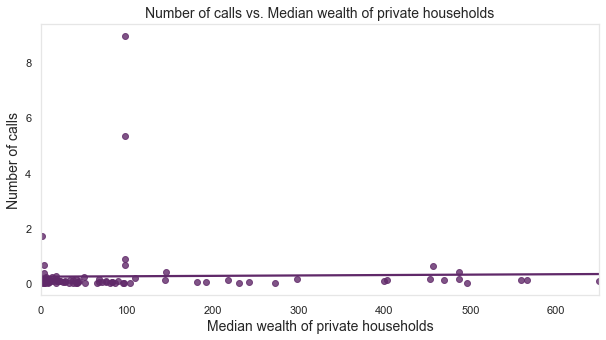

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.set(font_scale=1)

sns.regplot(x = "wealth_private_households", y =  "number_calls_n", data=data_18, ci=None, color=color[9])
ax.set_xlabel('Median wealth of private households', fontsize=14)
ax.set_ylabel('Number of calls', fontsize=14)
ax.set_title('Number of calls vs. Median wealth of private households', fontsize=14)
plt.show

for txt in fig.texts:
    txt.set_visible(False)
    
ax.grid(False)
ax.set_facecolor('w')
ax.spines['bottom'].set_color('0.9')
ax.spines['left'].set_color('0.9')
ax.spines['top'].set_color('0.9')
ax.spines['right'].set_color('0.9')

for txt in fig.texts:
    txt.set_visible(False)
    
fig.savefig('figures/regplot_medianWealthHouseholds.png', dpi=300, bbox_inches='tight')

In [34]:
print('correlation wealth_private_households:', round(corr_matrix.loc['number_calls_n', 'wealth_private_households'], 5))

correlation wealth_private_households: 0.02225


In [42]:
mean_squared_error(data_18['wealth_private_households'], data_18['number_calls'])

251057.04483191707

In [43]:
import math
math.sqrt(mean_squared_error(data_18['wealth_private_households'], data_18['number_calls']))

501.05592984408145

**VARIABLES**
<br>
<br>
"Number of employed persons" : "employed_persons"
<br>
<br>
"Potential labour force" : "potencial_labour_force"
<br>
<br>
"cars" : "private_cars"
<br>
<br>
"All offences" : "offences"
<br>
<br>
"% Dutch natives" : "dutch_natives"
<br>
<br>
"Number of inhabitants" : "n_inhabitants"
<br>
<br>
"Population density" : "population_density"
<br>
<br>
"65 or older" : "65_or_older"
<br>
<br>
"Single person households" : "single_person_households"
<br>
<br>
"Households without children" : "households_without_children"
<br>
<br>
"Households with children" : "households_with_children"
<br>
<br>
"Person with disability benefit" : "disability_benefit"
<br>
<br>
"Distance to GP" : "distance_to_gp"
<br>
<br>
"Low-income households" : "low_income_households"
<br>
<br>
"Median wealth of private households" : "wealth_private_households"
<br>
<br>
"Number of calls" : "number_calls"
<br>

In [62]:
import statsmodels.api as sm

### RESULTS:
(without outliers)

"private_cars" **N** (R-squared: 0.009) - The regression coef from statsmodels are: beta_0 = 0.15040058 and beta_1 = -0.04741964
<br>
<br>
"offences" (R-squared: 0.430) - The regression coef from statsmodels are: beta_0 = 209.56537383 and beta_1 = 0.66346518
<br>
<br>
"dutch_natives" **N** (R-squared: 0.083) - The regression coef from statsmodels are: beta_0 = 0.03175620 and beta_1 = 0.00166862
<br>
<br>
"65 or older" (R-squared:  0.430) - The regression coef from statsmodels are: beta_0 = 138.62449840 and beta_1 = 0.39172622
<br>
<br>
"single_person_households" (R-squared: 0.542) - The regression coef from statsmodels are: beta_0 = 127.79067293 and beta_1 = 0.25215665
<br>
<br>
"households_with_children" (R-squared: 0.360) - The regression coef from statsmodels are: beta_0 = 159.67565461 and beta_1 = 0.33724615
<br>
<br>
"disability_benefit" (R-squared: 0.477) - The regression coef from statsmodels are: beta_0 = 163.02549602 and beta_1 = 1.18589354
<br>
<br>
"distance_to_gp" (R-squared: 0.104) - The regression coef from statsmodels are: beta_0 = 586.63484364 and beta_1 = -270.43142011
<br>
<br>
"low_income_households" **N** (R-squared: -0.009) - The regression coef from statsmodels are: beta_0 = 0.12044701 and beta_1 = -0.00034227
<br>
<br>
"wealth_private_households" **N** (R-squared: 0.015) - The regression coef from statsmodels are: beta_0 = 0.10785109 and beta_1 = 0.00009960
<br>
<br>
"n_inhabitants"  (R-squared: 0.509) - beta_0 = 82.80438524 and beta_1 = 0.06775468

In [56]:
y = np.asarray(data_18['number_calls'])

In [59]:
y_n = np.asarray(data_18['number_calls_n'])

In [60]:
y = y.reshape(y.shape[0], 1)
y_n = y_n.reshape(y_n.shape[0], 1)
x = x.reshape(x.shape[0], 1)

print('y shape:', y.shape)
print('y_n shape:', y_n.shape)

y shape: (106, 1)
y_n shape: (106, 1)


In [63]:
#Creates the X matrix and appends a column of ones to x_train
X = sm.add_constant(x)

#To build the OLS model (ordinary least squares) 
toyregr_sm = sm.OLS(y, X)

#To fit and save regression info in results_sm
results_sm = toyregr_sm.fit()

#To get the beta parameters
beta0_sm = results_sm.params[0]
beta1_sm = results_sm.params[1]

print(f'The regression coef from statsmodels are: beta_0 = {beta0_sm:8.8f} and beta_1 = {beta1_sm:8.8f}')

The regression coef from statsmodels are: beta_0 = 82.80438524 and beta_1 = 0.06775468


In [64]:
print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     107.8
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           9.35e-18
Time:                        21:34:53   Log-Likelihood:                -719.80
No. Observations:                 106   AIC:                             1444.
Df Residuals:                     104   BIC:                             1449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.8044     38.198      2.168      0.0

In [93]:
x = np.asarray(data_18['private_cars'])

In [56]:
x = np.asarray(data_18['offences'])

In [99]:
x = np.asarray(data_18['dutch_natives'])

In [65]:
x = np.asarray(data_18['older_65'])

In [69]:
x = np.asarray(data_18['single_person_households'])

In [73]:
x = np.asarray(data_18['households_with_children'])

In [77]:
x = np.asarray(data_18['disability_benefit'])

In [81]:
x = np.asarray(data_18['distance_to_gp'])

In [103]:
x = np.asarray(data_18['low_income_households'])

In [89]:
x = np.asarray(data_18['wealth_private_households'])

In [57]:
x = np.asarray(data_18['n_inhabitants'])